In [1]:
%matplotlib inline


# The Bayes update


This animation displays the posterior estimate updates as it is refitted when
new data arrives.
The vertical line represents the theoretical value to which the plotted
distribution should converge.



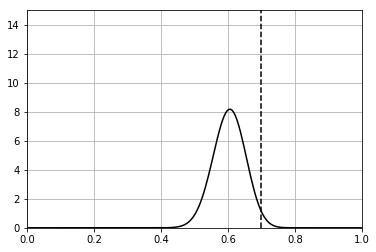

In [4]:
# update a distribution based on new data.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.animation import FuncAnimation


class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                     interval=100, blit=True)

from IPython.display import HTML
HTML(anim.to_jshtml())
# from IPython.display import HTML
# HTML(anim.to_html5_video())